# <b>IFI 8420 - Final Project</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

Introduction

<hr>

#### Installing all the requirement packages

In [70]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Getting the State Energy Data System (SEDS) data provided by the U.S. Department of Energy, The Energy Information Administration (EIA) API
https://www.eia.gov/opendata/browser/seds
<br>The EIA browser API generates a url that has a built in offset value, as well as a request max limit of 5000. Since we want more than 5000 items, using Offest Pagination allows us to run a while loop that will grab the next 5000 items until the total set amount of items is reached. This is possible because the browser API also tells you how many total items your request generates.

In [7]:
# api_key = 'v4Mpa3bxglq7V73FG1c9siXRib7Rtvsi6k17OSV5'
# offset = 0
# total = 2242317
# data = []

# while offset < total:
#     url = ('https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&sort[0][column]=seriesId&sort[0][direction]=desc&offset=' + str(offset) + '&length=5000')
#     response = requests.get(url, headers={'X-API-Key': api_key})
    
#     if response.status_code == 200:
#         data.extend(response.json()['response']['data'])
#         offset += 5000
#     else:
#         print('Error ' + str(response.status_code) + ': ' + response.text)
#         break

# print('Successfully retrieved ' + str(len(data)) + ' rows.')

Successfully retrieved 2242317 rows.


In [57]:
# df = pd.DataFrame(paginated_data)
# df.head()

In [56]:
# df.to_csv('EIA_raw.csv')

In [8]:
EIA_raw_df = pd.read_csv('EIA_raw.csv')
EIA_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242317 entries, 0 to 2242316
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   period             int64  
 2   seriesId           object 
 3   seriesDescription  object 
 4   stateId            object 
 5   stateDescription   object 
 6   value              float64
 7   unit               object 
dtypes: float64(1), int64(2), object(5)
memory usage: 136.9+ MB


In [9]:
EIA_raw_df.head()

,Unnamed: 0,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,0,2021,ZWHDP,Heating degree days (HDD),VA,Virginia,3927.0,Days
1,1,2023,ZWHDP,Heating degree days (HDD),FL,Florida,428.0,Days
2,2,2023,ZWHDP,Heating degree days (HDD),DE,Delaware,3844.0,Days
3,3,2023,ZWHDP,Heating degree days (HDD),DC,District of Columbia,3272.0,Days
4,4,2023,ZWHDP,Heating degree days (HDD),AL,Alabama,2153.0,Days


#### Visualizing the SEDS data

In [41]:
# Simple regex filtering of the data since it is not cleaned
renew_keywords = ['solar', 'wind', 'renewable', 'hydroelectric', 'geothermal', 'hydropower', 'total energy']
nonrenew_keywords = ['diesel', 'oil', 'gasoline', 'coal', 'fossil', 'hydrocarbon', 'nuclear', 'wood']
include_pattern = '|'.join(renew_keywords)
exclude_pattern = '|'.join(nonrenew_keywords)

EIA_renewable = EIA_raw_df[EIA_raw_df['seriesDescription'].str.contains(include_pattern, case=False, na=False) & ~EIA_raw_df['seriesDescription'].str.contains(exclude_pattern, case=False, na=False)]

In [42]:
EIA_renewable = EIA_renewable.drop(columns=['Unnamed: 0'])
EIA_renewable.reset_index(drop=True, inplace=True)
EIA_renewable.index = EIA_renewable.index + 1
EIA_renewable.head()

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
1,2012,WYTXP,Wind energy total end-use net generation,NV,Nevada,0.0,Million kilowatthours
2,1967,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
3,1966,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
4,1965,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
5,1964,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours


In [57]:
# Solar Energy Pie chart
solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
state_vals = solar_df.groupby('stateId')['value'].sum()
state_vals_sorted = state_vals.sort_values(ascending=False)
state_vals_sorted.drop('US', inplace=True)
print(state_vals_sorted)

stateId
CA    507159.0
TX    125329.0
AZ     95096.0
NC     81002.0
FL     74562.0
NV     70389.0
NJ     41294.0
GA     40506.0
MA     37894.0
NY     31106.0
UT     30502.0
CO     26563.0
VA     23792.0
NM     20777.0
SC     16267.0
HI     16041.0
MD     15156.0
MN     13821.0
OR     12290.0
IL     11906.0
CT      9386.0
PA      8394.0
IN      7964.0
OH      7211.0
ID      5592.0
MI      5458.0
AL      4958.0
WI      4885.0
MO      4776.0
TN      4719.0
AR      4686.0
RI      4534.0
IA      3481.0
LA      3449.0
ME      3378.0
MS      3373.0
WA      3246.0
VT      3091.0
DE      2234.0
NH      1586.0
DC      1327.0
WY      1207.0
KY      1070.0
OK      1007.0
KS       891.0
MT       828.0
NE       626.0
WV       202.0
AK        79.0
SD        76.0
ND         9.0
Name: value, dtype: float64


In [49]:
smallest_year = solar_df['period'].min()
largest_year = solar_df['period'].max()
print(smallest_year)
print(largest_year)

1960
2023


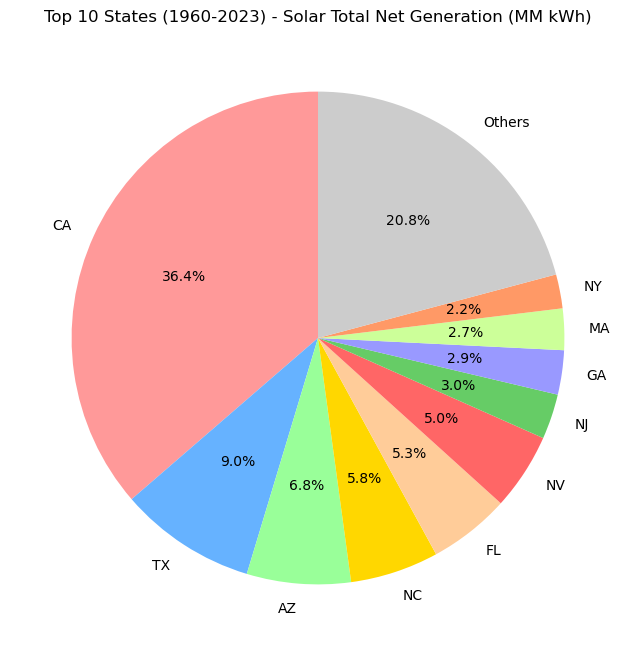

In [54]:
top_10 = state_vals_sorted.iloc[:10]
others = state_vals_sorted.iloc[10:].sum()
top_10['Others'] = others

plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10.index, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFCC99', '#FF6666', '#66CC66', '#9999FF', '#CCFF99', '#FF9966', '#CCCCCC']
)
plt.title('Top 10 States (1960-2023) - Solar Total Net Generation (MM kWh)')
plt.ylabel('')
plt.show()

In [64]:
# Solar Energy Bar Chart
solar_df_2 = EIA_renewable[(EIA_renewable['seriesId'] == 'SOTGP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)]

state_vals_2 = solar_df_2.groupby('stateId')['value'].sum()
state_vals_sorted_2 = state_vals_2.sort_values(ascending=False)
state_vals_sorted_2.drop('US', inplace=True)
print(state_vals_sorted_2)

stateId
CA    485151.0
TX    124979.0
AZ     92768.0
NC     80753.0
FL     74018.0
NV     68812.0
GA     40428.0
NJ     38558.0
MA     37498.0
NY     30627.0
UT     30477.0
CO     25609.0
VA     23767.0
NM     20211.0
SC     16261.0
HI     15562.0
MD     14964.0
MN     13797.0
OR     12096.0
IL     11801.0
CT      9239.0
IN      7956.0
PA      7873.0
OH      7062.0
ID      5587.0
MI      5415.0
AL      4956.0
WI      4833.0
MO      4753.0
TN      4695.0
AR      4678.0
RI      4502.0
IA      3480.0
LA      3414.0
MS      3373.0
ME      3370.0
WA      3213.0
VT      3055.0
DE      2118.0
NH      1574.0
DC      1272.0
WY      1206.0
KY      1064.0
OK      1005.0
KS       890.0
MT       807.0
NE       625.0
WV       198.0
AK        79.0
SD        76.0
ND         9.0
Name: value, dtype: float64


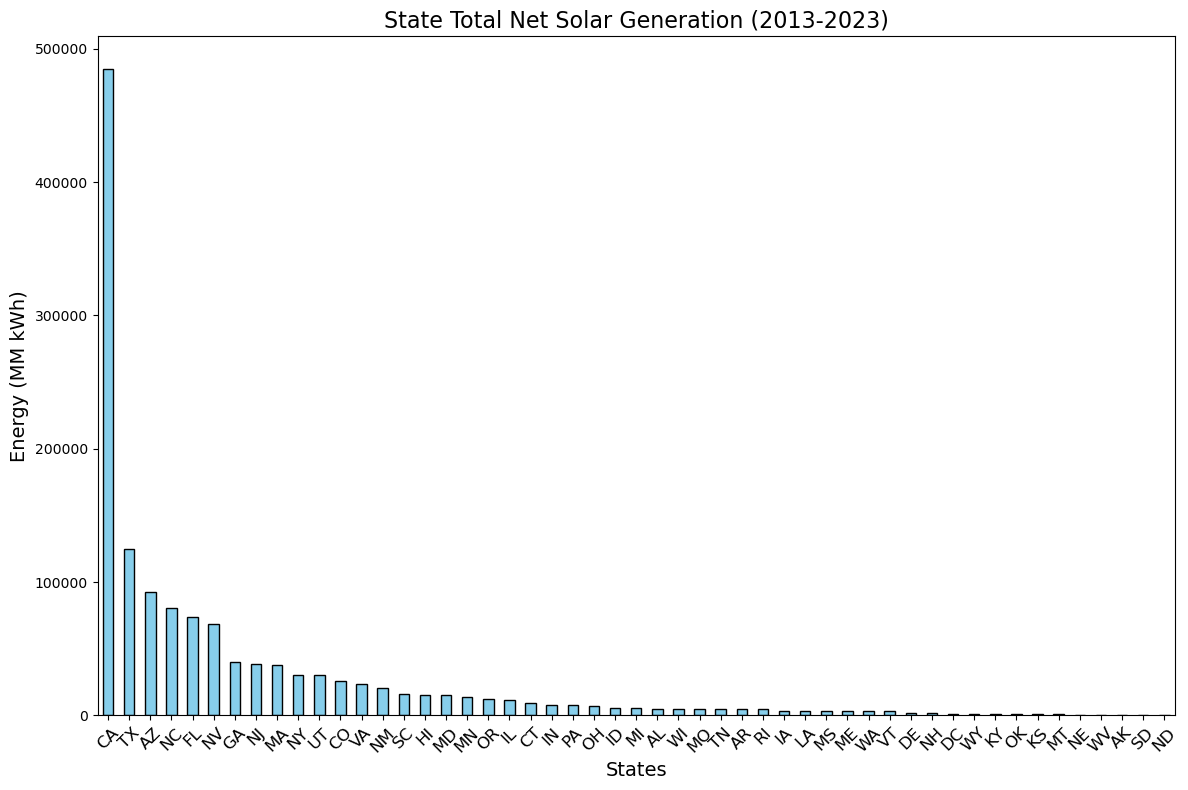

In [69]:
plt.figure(figsize=(12, 8))
state_vals_sorted_2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('State Total Net Solar Generation (2013-2023)', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Energy (MM kWh)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()